# Projet Fil Rouge : Classification des commentaires toxiques

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
from wordcloud import WordCloud, STOPWORDS

In [140]:
DataTrain = pd.read_csv('/Users/cherifabass/Documents/INSA/all/train.csv')
DataTest = pd.read_csv('/Users/cherifabass/Documents/INSA/all/test.csv')
DataSample = pd.read_csv('/Users/cherifabass/Documents/INSA/all/sample_submission.csv')


## Statistiques descriptives

In [141]:
pd.DataFrame(DataTrain)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Le jeu de données Train comporte 159571 observations de 8 variables :  
* ID   
* comment_text (le commentaire)  
* toxic (binaire indiquant si le commentaire est toxique)
* severe_toxic (binaire indiquant si le commentaire est extrêmement toxique)
* obscene (binaire indiquant si le commentaire est obscène)
* threat (binaire indiquant si le commentaire est une menace)
* insult (binaire indiquant si le commentaire est une insulte)
* identity_hate (binaire indiquant si le commentaire est raciste)

In [142]:
DataTrain.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Maintenanet nous allons regarder le nombre d'occurences de chaque label.

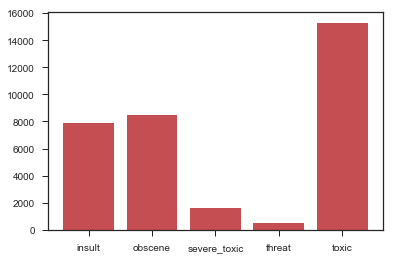

In [148]:
plt.bar(DataTrain.columns.values[2:-1], [sum(DataTrain[column]) for column in DataTrain.columns.values[2:-1]])
sns.set_style('whitegrid')
plt.show()

On voit que les commentaires toxiques sont les plus fréquents.

Maintenant nous allons nous intéresser aux longueurs des commentaires. Pour cela on crée une variable *comment_length* qui nous donnera le nombre de mots dans chaque commentaire.

In [149]:
DataTrain['comment_length']=DataTrain['comment_text'].apply(lambda x: len(str(x).split()))

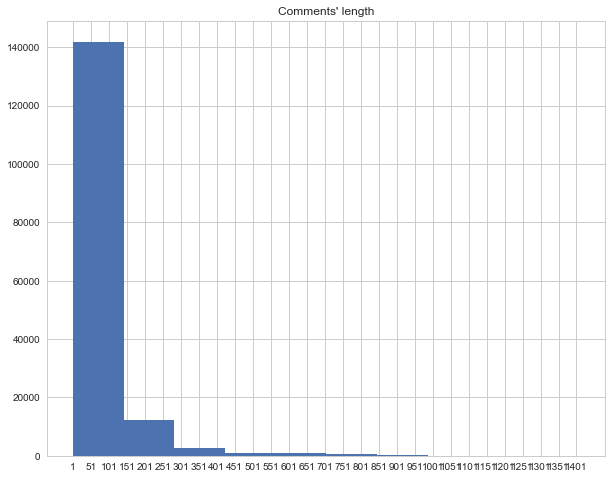

In [150]:
plt.figure(figsize=(10, 8))
DataTrain['comment_length'].hist()
plt.title('Comments\' length')
plt.xticks(np.arange(min(DataTrain['comment_length']), max(DataTrain['comment_length']), 50))
plt.show()

On voit sur l'histogramme précédent que la majorité des commentaires ont un nombre de mots entre 1 et 100.

Nous allons aussi regarder le nombre de mots en fonction du label. Pour cela on récupère pour chaque label les observations correspondantes.

In [151]:
Toxic = DataTrain[DataTrain["toxic"]==1]
SevereToxic = DataTrain[DataTrain["severe_toxic"]==1]
Obscene = DataTrain[DataTrain["obscene"]==1]
IdentityHate = DataTrain[DataTrain["identity_hate"]==1]
Threat = DataTrain[DataTrain["threat"]==1]
Insult = DataTrain[DataTrain["insult"]==1]

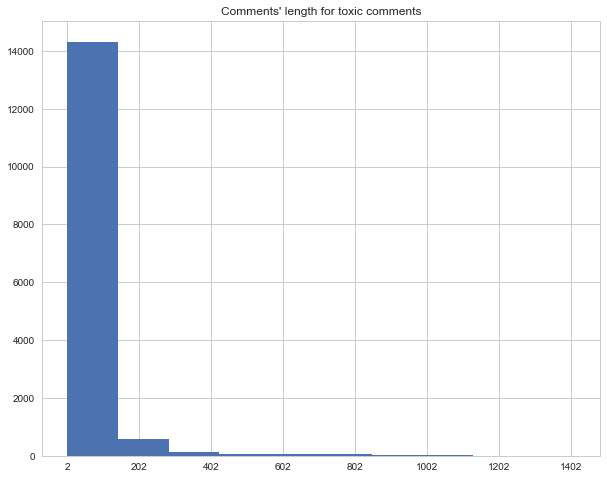

In [152]:
plt.figure(figsize=(10, 8))
Toxic['comment_length'].hist()
plt.title('Comments\' length for toxic comments')
plt.xticks(np.arange(min(Toxic['comment_length']), max(Toxic['comment_length']), 200))
plt.show()

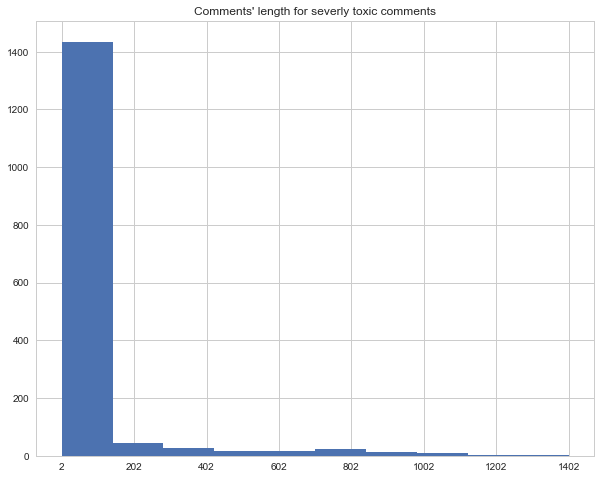

In [153]:
plt.figure(figsize=(10, 8))
SevereToxic['comment_length'].hist()
plt.title('Comments\' length for severly toxic comments')
plt.xticks(np.arange(min(SevereToxic['comment_length']), max(SevereToxic['comment_length']), 200))
plt.show()

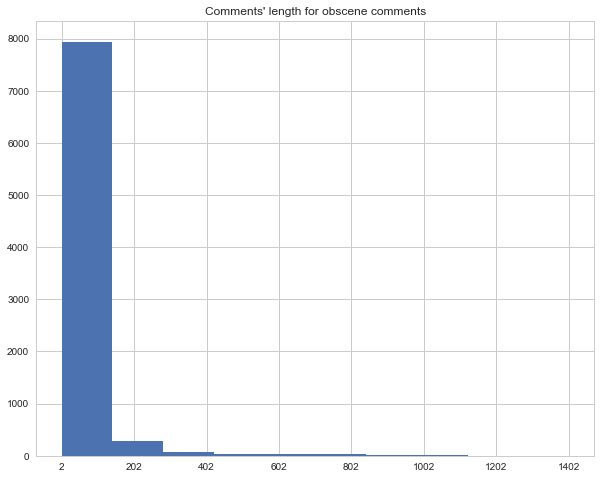

In [154]:
plt.figure(figsize=(10, 8))
Obscene['comment_length'].hist()
plt.title('Comments\' length for obscene comments')
plt.xticks(np.arange(min(Obscene['comment_length']), max(Obscene['comment_length']), 200))
plt.show()

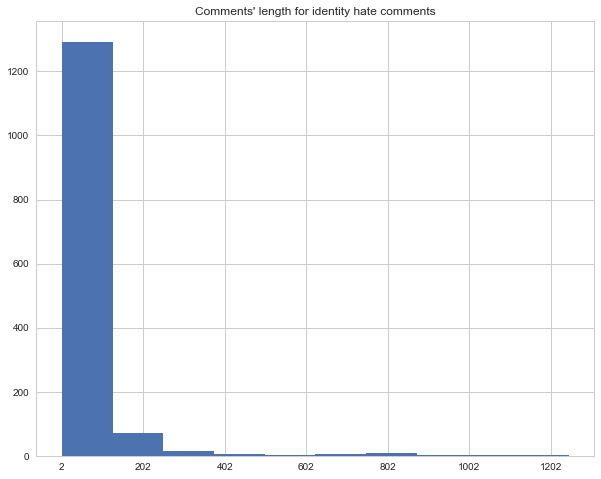

In [156]:
plt.figure(figsize=(10, 8))
IdentityHate['comment_length'].hist()
plt.title('Comments\' length for identity hate comments')
plt.xticks(np.arange(min(IdentityHate['comment_length']), max(IdentityHate['comment_length']), 200))
sns.set_style('darkgrid')
plt.show()

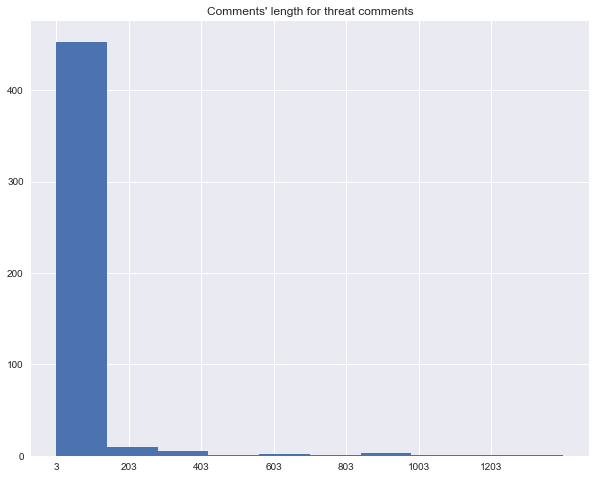

In [157]:
plt.figure(figsize=(10, 8))
Threat['comment_length'].hist()
plt.title('Comments\' length for threat comments')
plt.xticks(np.arange(min(Threat['comment_length']), max(Threat['comment_length']), 200))
plt.show()

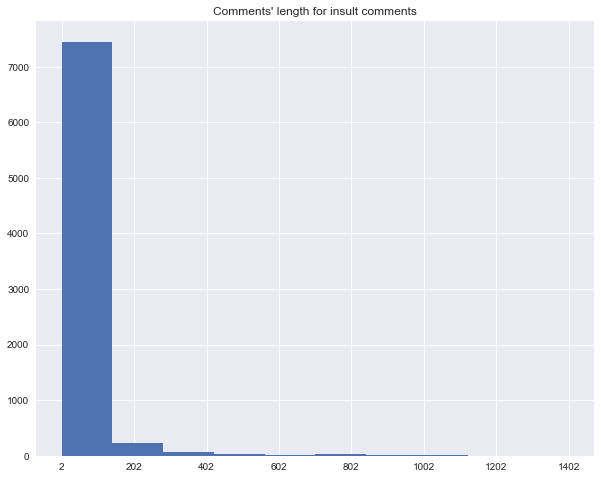

In [158]:
plt.figure(figsize=(10, 8))
Insult['comment_length'].hist()
plt.title('Comments\' length for insult comments')
plt.xticks(np.arange(min(Insult['comment_length']), max(Insult['comment_length']), 200))
plt.show()

On voit sur les histogrammes précédents que le nombre de mots dans un commentaire ne dépend pas du label du commentaire.

Maintenant nous allons regarder les mots les plus fréquents de chaque label. Pour cela on récupère les commentaires associés à chaque label.

In [124]:
ToxicComments = DataTrain["comment_text"][DataTrain["toxic"]==1]
SevereToxicComments = DataTrain["comment_text"][DataTrain["severe_toxic"]==1]
ObsceneComments = DataTrain["comment_text"][DataTrain["obscene"]==1]
IdentityHateComments = DataTrain["comment_text"][DataTrain["identity_hate"]==1]
ThreatComments = DataTrain["comment_text"][DataTrain["threat"]==1]
InsultComments = DataTrain["comment_text"][DataTrain["insult"]==1]

Nous allons utiliser la bibliothèque WordCloud pour représenter les mots fréquents de chaque label.

In [126]:
from PIL import Image


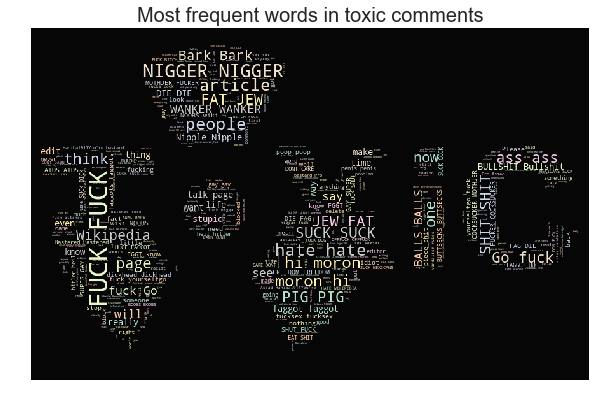

In [127]:
wave_mask = np.array(Image.open( "Toxic-Logo.jpg"))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(ToxicComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in toxic comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

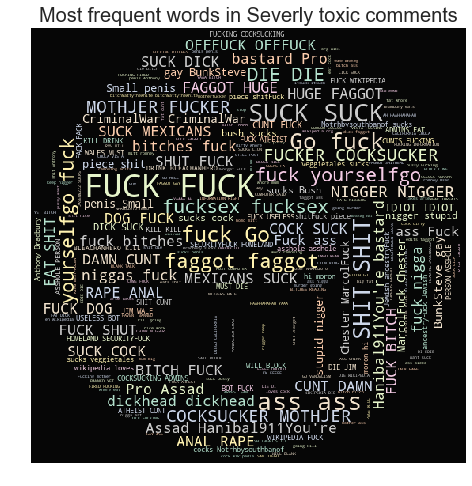

In [128]:
wave_mask = np.array(Image.open("obscene.jpg"))
wc = WordCloud(background_color="black", max_words=10000, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(SevereToxicComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in Severly toxic comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

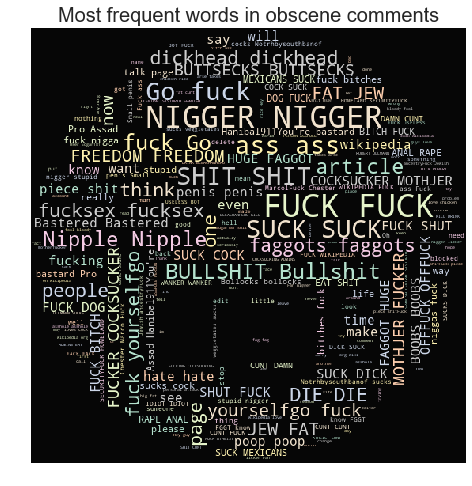

In [129]:
wc = WordCloud(background_color="black", max_words=10000, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(ObsceneComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in obscene comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

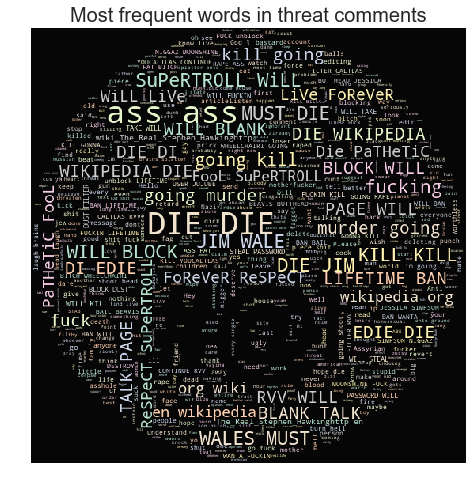

In [130]:
wc = WordCloud(background_color="black", max_words=10000, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(ThreatComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in threat comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

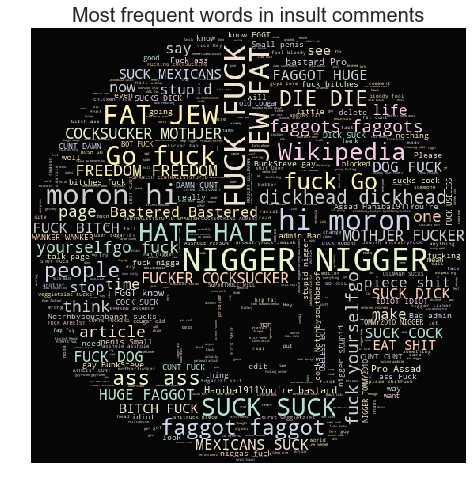

In [131]:
wc = WordCloud(background_color="black", max_words=10000, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(InsultComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in insult comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

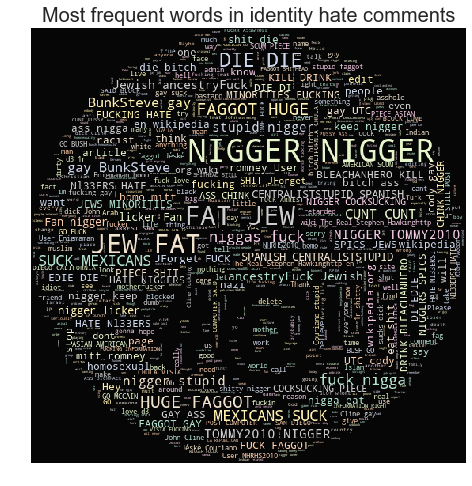

In [132]:
wc = WordCloud(background_color="black", max_words=10000, 
               mask=wave_mask, stopwords=STOPWORDS, max_font_size= 40)
wc.generate(" ".join(IdentityHateComments))
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in identity hate comments", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')
plt.show()

On observe donc que certains mots sont présents dans tous les labels. Cela est dû au caractère familier de ces mots qui fait qu'elles sont toujours présentes peu importe le niveau de toxicité du commentaire. En revanche on remarque que certains mots ne sont présents que pour certains labels.